In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [13]:
data = load_iris()

In [14]:
X = data.data
y = data.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_Scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

# 🤔 Selection of K

In [21]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X_train_Scaled, y_train, cv = 5)
    print(f"K={k}, Accuracy={score.mean():.3f}")

K=1, Accuracy=0.942
K=2, Accuracy=0.933
K=3, Accuracy=0.950
K=4, Accuracy=0.942
K=5, Accuracy=0.925
K=6, Accuracy=0.933
K=7, Accuracy=0.942
K=8, Accuracy=0.942
K=9, Accuracy=0.942
K=10, Accuracy=0.942
K=11, Accuracy=0.950
K=12, Accuracy=0.950
K=13, Accuracy=0.950
K=14, Accuracy=0.942
K=15, Accuracy=0.950
K=16, Accuracy=0.925
K=17, Accuracy=0.933
K=18, Accuracy=0.917
K=19, Accuracy=0.917
K=20, Accuracy=0.917


# 🧭 Decision Surface of KNN

In [23]:
X_vis = X_train_Scaled[:, :2]
y_vis = y_train

In [24]:
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis, y_vis)

KNeighborsClassifier(n_neighbors=3)

In [25]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

In [26]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [27]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

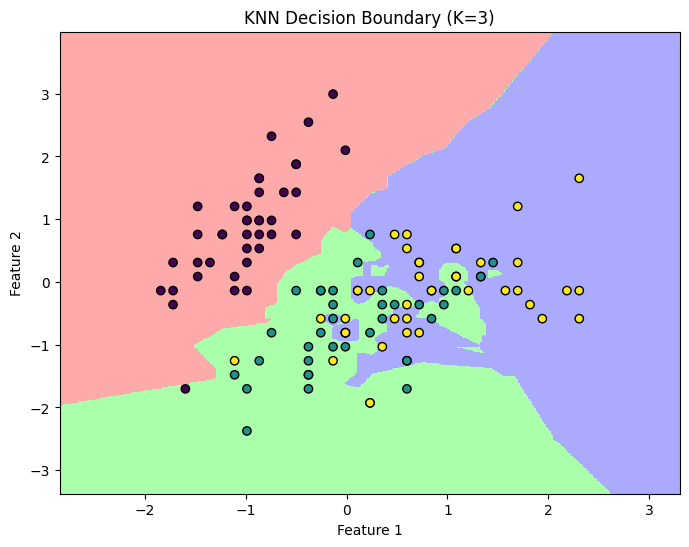

In [28]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k')
plt.title("KNN Decision Boundary (K=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()